<a href="https://colab.research.google.com/github/sxudan/imageprocessing/blob/main/Morphological_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Morphological Image Processing

Morphological image processing is a technique used for analyzing and processing structures in images based on their shapes. Morphological operations typically involve the modification of an image using certain structuring elements or kernels. Common morphological operations include erosion, dilation, opening, closing, and more.

Morphological operations are defined in terms of sets. In image processing, we use
morphology with two types of sets of pixels: objects and structuring elements (SE’s).
Typically, objects are defined as sets of foreground pixels. Structuring elements can
be specified in terms of both foreground and background pixels. In addition, structuring elements sometimes contain so-called “don’t care” elements, denoted by ×,
signifying that the value of that particular element in the SE does not matter. In this
sense, the value can be ignored, or it can be made to fit a desired value in the evaluation of an expression; for example, it might take on the value of a pixel in an image
in applications in which value matching is the objective.

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import PIL

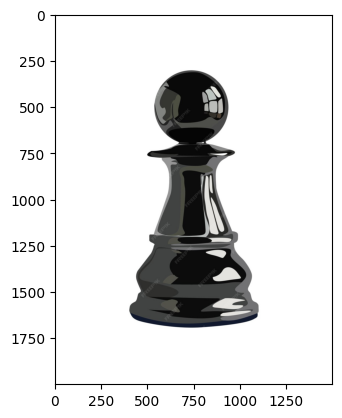

In [52]:
image = PIL.Image.open(requests.get('https://img.freepik.com/premium-vector/black-chess-piece-pawn-with-highlights-white-background_490191-310.jpg?w=2000', stream=True).raw)
image = np.array(image)
plt.imshow(image)

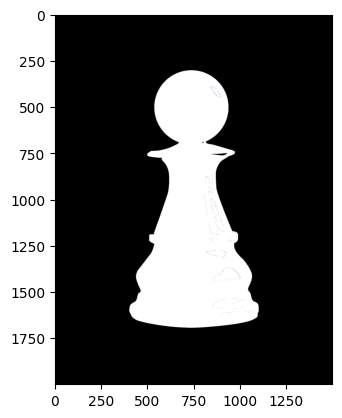

In [80]:
_, mask = cv2.threshold(image, 240, 255, cv2.THRESH_BINARY)
mask = cv2.bitwise_not(mask)

plt.imshow(mask)

# Morphological Closing

Closing is the opposite of opening and is performed by dilation followed by erosion. It's useful for closing small holes or gaps in the foreground objects.

(<Axes: >, <matplotlib.image.AxesImage at 0x7fe41dda3370>)

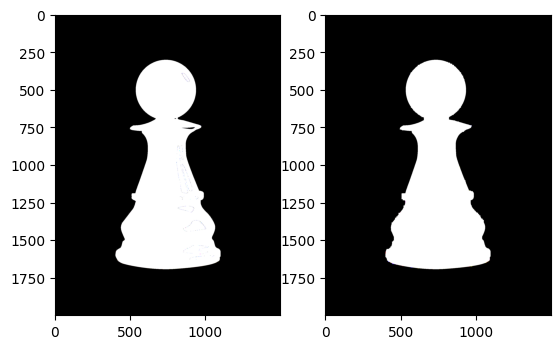

In [81]:
# Create a kernel for morphological operations
kernel = np.ones((15, 15), np.uint8)

# Perform dilation followed by erosion to fill holes
closed_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

plt.subplot(121),plt.imshow(mask)
plt.subplot(122),plt.imshow(closed_mask)


# Dilation
Dilation expands the shapes in an image. It is performed by moving the kernel over the image and setting the pixel in the kernel's position to non-zero if at least one pixel under the kernel is non-zero.

(<Axes: title={'center': 'Edge after Dilation'}>,
 Text(0.5, 1.0, 'Edge after Dilation'))

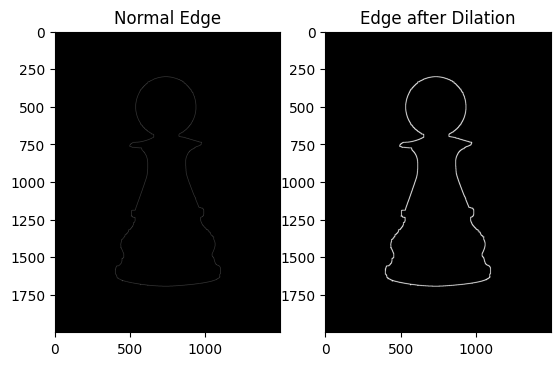

In [101]:
# Define the kernel for dilation
kernel = np.ones((5,5), np.uint8)
edges = cv2.Canny(closed_mask, 50, 150)
# Perform dilation
dilation = cv2.dilate(edges, kernel, iterations=1)

plt.subplot(121),plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)),plt.title('Normal Edge')
plt.subplot(122),plt.imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB)),plt.title('Edge after Dilation')

# Erosion

This operation shrinks the shapes in an image. It is achieved by moving the kernel over the image and only keeping the pixel in the kernel's position if all the pixels under the kernel are non-zero.

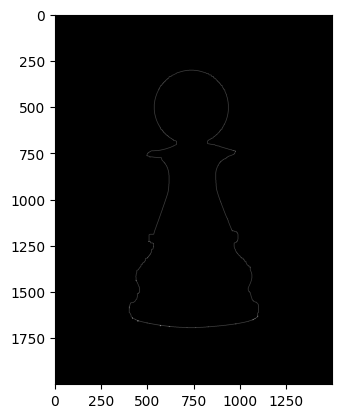

In [103]:
# Define the kernel for erosion
kernel = np.ones((5,5), np.uint8)

# Perform erosion
erosion = cv2.erode(dilation, kernel, iterations=1)
plt.imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))

# Gradient

Gradient is the difference between dilation and erosion of an image. It outlines the boundaries of objects in an image.

While the morphological gradient can help in accentuating the edges of objects to some extent, it may not provide the same level of edge detection as specific edge detection algorithms like Canny edge detection.



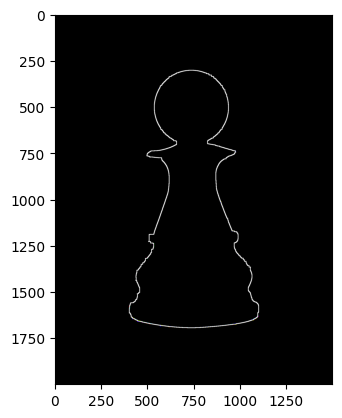

In [82]:
# Define the kernel for morphological operations
kernel = np.ones((5,5), np.uint8)

# Perform gradient
gradient = cv2.morphologyEx(closed_mask, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient)